#### Урок 7. Многомерный статистический анализ. Линейная регрессия

#### Задание 1 
Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):  
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],  
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].  
Используя математические операции, посчитать коэффициенты линейной регрессии, приняв за X заработную плату (то есть, zp - признак), а за y - значения скорингового балла (то есть, ks - целевая переменная). Произвести расчет как с использованием intercept, так и без.

In [4]:
import numpy as np
x = np.array([35, 45, 190, 200, 40, 70, 54, 150, 120, 110])
y = np.array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [5]:
b_1 = (len(x)*(np.sum(x*y)) - (np.sum(x)*np.sum(y)))/(len(x)*np.sum(x**2) - np.sum(x)**2)
b_0 = np.mean(y) - b_1 * np.mean(x)
y_hat = b_0 + b_1 * x
y_hat

array([535.89621821, 562.10160703, 942.07974498, 968.2851338 ,
       548.99891262, 627.61507909, 585.68645697, 837.25818968,
       758.64202321, 732.43663439])

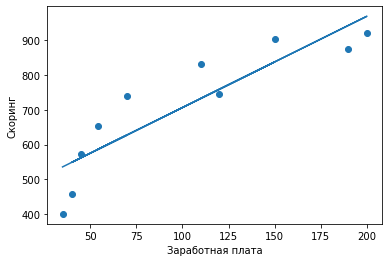

In [6]:
import matplotlib.pyplot as plt
plt.scatter(x, y)
plt.plot(x, y_hat)
plt.xlabel('Заработная плата')
plt.ylabel('Скоринг')
plt.show()

In [8]:
r = b_1 * np.std(x) / np.std(y)
R2 = r ** 2
A_mean = (abs((y - y_hat) / y)).sum() / len(x) * 100
mse = ((y - y_hat) ** 2).sum() / len(x)
round(mse, 2)

6470.41

In [9]:
x_reshaped = x.reshape((len(x), 1))
y_reshaped = y.reshape((len(y), 1))
b_no_intercept = np.dot(np.linalg.inv(np.dot(x_reshaped.T, x_reshaped)), x_reshaped.T@y_reshaped)
b_no_intercept

array([[5.88982042]])

In [10]:
x_2d = np.hstack([np.ones((len(x), 1)), x_reshaped])
b_with_intercept = np.dot(np.linalg.inv(np.dot(x_2d.T, x_2d)), x_2d.T@y_reshaped)
b_with_intercept

array([[444.17735732],
       [  2.62053888]])

In [11]:
y_hat_no_intercept = b_no_intercept[0] * x
y_hat_with_intercept = b_with_intercept[0] + b_with_intercept[1] * x

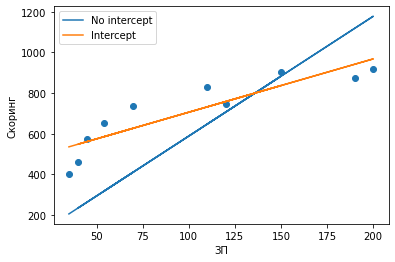

In [12]:
plt.scatter(x, y)
plt.plot(x, y_hat_no_intercept, label='No intercept')
plt.plot(x, y_hat_with_intercept, label='Intercept')
plt.xlabel('ЗП')
plt.ylabel('Скоринг')
plt.legend()
plt.show()

#### Задание 2
Посчитать коэффициент линейной регрессии при заработной плате (zp), используя градиентный спуск (без intercept).

In [13]:
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [14]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [15]:
def mse(b_1, y=y, x=x, n=len(x)):
    return (1/n) * np.sum((b_1 * x - y) ** 2)

def mse_p(b_1, y=y, x=x, n=len(x)):
    return (2/n) * np.sum((b_1 * x - y) * x)

In [16]:
alpha = 3e-6
b_1 = 0
for i in range(301):
    b_1 -= alpha * mse_p(b_1)
    if not i % 20:
        print(i, ' b_1 = ', b_1, ' mse = ', mse(b_1))

0  b_1 =  0.48685020000000007  mse =  458684.56693028915
20  b_1 =  4.927669981711723  mse =  69270.31808553186
40  b_1 =  5.718482539589841  mse =  56921.293506120615
60  b_1 =  5.8593089032880945  mse =  56529.68377813735
80  b_1 =  5.884386988499192  mse =  56517.26513097497
100  b_1 =  5.8888528451849655  mse =  56516.871313389966
120  b_1 =  5.889648116266068  mse =  56516.858824727686
140  b_1 =  5.8897897365949206  mse =  56516.858428689804
160  b_1 =  5.889814956067903  mse =  56516.85841613072
180  b_1 =  5.889819447102649  mse =  56516.85841573245
200  b_1 =  5.88982024685739  mse =  56516.85841571982
220  b_1 =  5.889820389276161  mse =  56516.85841571943
240  b_1 =  5.889820414637818  mse =  56516.85841571943
260  b_1 =  5.889820419154172  mse =  56516.85841571941
280  b_1 =  5.889820419958436  mse =  56516.858415719405
300  b_1 =  5.889820420101659  mse =  56516.858415719405


#### Задание 3
Произвести вычисления как в пункте 2, но с вычислением intercept. Учесть, что изменение коэффициентов должно производиться
на каждом шаге одновременно (то есть изменение одного коэффициента не должно влиять на изменение другого во время одной итерации).

In [17]:
x

array([ 35,  45, 190, 200,  40,  70,  54, 150, 120, 110])

In [18]:
y

array([401, 574, 874, 919, 459, 739, 653, 902, 746, 832])

In [19]:
def mse_with_intercept(b_0, b_1, y=y, x=x, n=len(x)):
    return np.sum((b_0+b_1*x-y)**2)/n

In [20]:
alpha = 5e-5
b_0 = 0
b_1 = 0

for i in range(900001):
    y_pred = b_0 + b_1*x
    b_0 -= alpha * (2/len(x)) * np.sum(y_pred-y)
    b_1 -= alpha * (2/len(x)) * np.sum((y_pred-y)*x)
    if not i % 100000:
        print(i, ': b_0 = ', b_0, ', b_1 = ', b_1, ', mse = ', mse_with_intercept(b_0,b_1))

0 : b_0 =  0.07099000000000001 , b_1 =  8.114170000000001 , mse =  124695.80133979912
100000 : b_0 =  409.02972996943777 , b_1 =  2.8792409593936914 , mse =  6783.780596229795
200000 : b_0 =  441.39579359939756 , b_1 =  2.641012421218453 , mse =  6472.376831131396
300000 : b_0 =  443.95722591469394 , b_1 =  2.622159146903591 , mse =  6470.426493229665
400000 : b_0 =  444.15993624675195 , b_1 =  2.6206671092362583 , mse =  6470.414278162422
500000 : b_0 =  444.17597862994756 , b_1 =  2.6205490302031937 , mse =  6470.414201658822
600000 : b_0 =  444.1772482152497 , b_1 =  2.6205396854940544 , mse =  6470.414201179681
700000 : b_0 =  444.17734868952454 , b_1 =  2.6205389459589687 , mse =  6470.414201176674
800000 : b_0 =  444.1773566410026 , b_1 =  2.6205388874325752 , mse =  6470.41420117666
900000 : b_0 =  444.1773572702722 , b_1 =  2.6205388828008727 , mse =  6470.414201176663
